In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## 属性降维

### PCA降维

In [45]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
print(X.shape)
print(X[:5])
# 初始化PCA，设置主成分数目
pca = PCA(n_components=2)

# 对数据进行PCA降维
X_pca = pca.fit_transform(X)

# 输出降维后的数据形状
print(X_pca.shape)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 2)


ICA独立成分分析

In [46]:
from sklearn.decomposition import FastICA
print(X.shape)
# 初始化ICA，设置主成分数目
ica = FastICA(n_components=2)
ica.fit(X)
X_ica = ica.transform(X)
print(X_ica.shape)

(150, 4)
(150, 2)


LDA线性判别分析

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print(X.shape)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_kpca = lda.transform(X)
print(X_kpca.shape)

(150, 4)
(150, 2)


## 特征选择
### 过滤法

方差过滤

选取的数据已经被清洗过，所以方差过滤的效果不会太好

In [25]:
data = load_iris()
X = data.data
y = data.target
print(X.shape)
selector = VarianceThreshold(1*10**-40)
x_feature_selection = selector.fit_transform(X)
print(x_feature_selection.shape)

(150, 4)
(150, 4)


相关性过滤 \
卡方过滤

In [27]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 留下300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X, y)
print(X_fschi.shape)

(150, 4)


d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=300 is greater than n_features=4. All the features will be returned.
  warnings.warn(


使用学习曲线来获得一个最优的超参数K

d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=390 is greater than n_features=4. All the features will be returned.
  warnings.warn(
d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=380 is greater than n_features=4. All the features will be returned.
  warnings.warn(
d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=370 is greater than n_features=4. All the features will be returned.
  warnings.warn(
d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=360 is greater than n_features=4. All the features will be returned.
  warnings.warn(
d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=350 is greater than n_features=4. All the feat

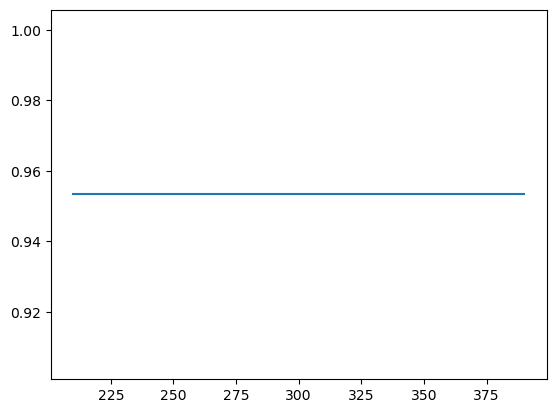

In [28]:
score = []
for i in range(390, 200, -10):
    x_fschi = SelectKBest(chi2, k=i).fit_transform(X, y)
    once = cross_val_score(
        RFC(n_estimators=10, random_state=0), x_fschi, y, cv=5).mean()
    score.append(once)
plt.plot(range(390, 200, -10), score)
plt.show()

In [29]:
chivalue, pvalues_chi = chi2(X, y)
print(chivalue)
print(pvalues_chi)

[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


In [30]:
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
print(k)

3


F检验

In [31]:
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X, y)
k = F.shape[0] - (pvalues_f > 0.05).sum()
k

np.int64(4)

互信息法

In [32]:
from sklearn.feature_selection import mutual_info_regression as MIC
result = MIC(X, y)
k = X.shape[1] - sum(result <= 0)
k

np.int64(4)

### Embedding嵌入法

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [13]:
rfc = RFC()
rfc.fit(X, y)
fi = rfc.feature_importances_
fi

array([3.68063403e-04, 1.55507755e-04, 3.40179337e-06, ...,
       4.08596449e-06, 0.00000000e+00, 3.36483008e-06])

In [14]:
threshold = np.linspace(0, fi.max(), 20)
threshold

array([0.        , 0.0002761 , 0.00055221, 0.00082831, 0.00110442,
       0.00138052, 0.00165663, 0.00193273, 0.00220884, 0.00248494,
       0.00276104, 0.00303715, 0.00331325, 0.00358936, 0.00386546,
       0.00414157, 0.00441767, 0.00469378, 0.00496988, 0.00524598])

In [35]:
score = []
for i in threshold:
    x_embedded = SelectFromModel(rfc, threshold=i).fit_transform(X, y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0),
                           x_embedded, y, cv=5).mean()
    score.append(once)

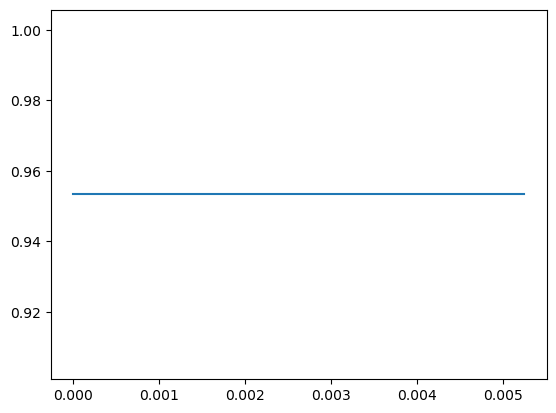

0.96


In [37]:
plt.plot(threshold, score)
plt.show()
X_embedded = SelectFromModel(rfc, threshold=0.00067).fit_transform(X, y)
X_embedded.shape
print(cross_val_score(rfc, X_embedded, y, cv=5).mean())

## 因子分析

### 使用sklearn实现因子分析

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 加载示例数据集
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# 将数据转换为DataFrame
df = pd.DataFrame(X, columns=feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


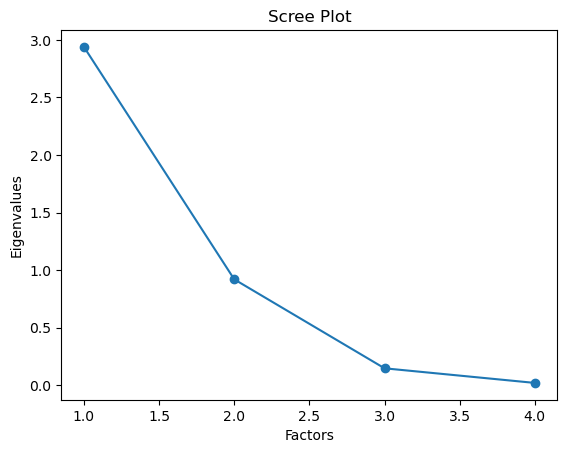

In [20]:
from sklearn.preprocessing import StandardScaler
# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 计算协方差矩阵的特征值
cov_matrix = np.cov(X_scaled, rowvar=False)
eigenvalues, _ = np.linalg.eig(cov_matrix)
# 绘制碎石图
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.show()

In [21]:
# 初始化因子分析模型，假设我们想要2个因子
fa = FactorAnalysis(n_components=2, random_state=42)

# 拟合模型并转换数据
X_fa = fa.fit_transform(X_scaled)

# 将结果转换为DataFrame
df_fa = pd.DataFrame(X_fa, columns=['Factor 1', 'Factor 2'])
print(df_fa.head())

# 获取因子载荷矩阵
loadings = pd.DataFrame(fa.components_.T, columns=[
                        'Factor 1', 'Factor 2'], index=feature_names)
print(loadings)

   Factor 1  Factor 2
0 -1.328255 -0.559732
1 -1.337759 -0.000107
2 -1.402517  0.307654
3 -1.300187  0.719597
4 -1.333781 -0.363828
                   Factor 1  Factor 2
sepal length (cm)  0.880960 -0.447287
sepal width (cm)  -0.416916 -0.553900
petal length (cm)  0.999189  0.019153
petal width (cm)   0.962289  0.058402


### 手动实现因子分析

In [32]:
n_factors = 2

#### 标准化

In [33]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # 标准化
X[:5]

array([[ 1.10252609, -0.92662384, -2.22574466,  0.19894046, -1.05119277],
       [-1.41317631, -0.09082591,  1.33010341, -0.83892082,  0.91055478],
       [ 1.17516225,  0.235568  , -0.17837558,  0.46713812, -1.23929943],
       [ 1.63974719,  0.75432769,  1.12727895, -1.82278903,  1.5553271 ],
       [ 1.28722509, -0.140075  ,  0.59776196, -1.49282457,  0.41577788]])

### 计算相关系数矩阵

In [34]:
R = np.cov(X, rowvar=False)  # 计算协方差矩阵
R

array([[ 1.01010101, -0.03578495, -0.00420521,  0.16590033, -0.03816365],
       [-0.03578495,  1.01010101, -0.03823689, -0.09396191,  0.10202764],
       [-0.00420521, -0.03823689,  1.01010101, -0.04038821, -0.14398062],
       [ 0.16590033, -0.09396191, -0.04038821,  1.01010101,  0.02946688],
       [-0.03816365,  0.10202764, -0.14398062,  0.02946688,  1.01010101]])

#### 计算特征值和特征向量

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(R)  # 计算特征值和特征向量
eigenvalues

array([1.23575513, 1.18666926, 0.80051743, 0.95759901, 0.86996422])

选择最大的K个特征值对应的特征向量

In [37]:
idx = eigenvalues.argsort()[::-1]  # 对特征值排序
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvals = eigenvalues[:n_factors]
eigenvecs = eigenvectors[:, :n_factors]

#### 计算因子载荷矩阵

In [42]:
loadings = eigenvecs * np.sqrt(eigenvals)
loadings

array([[-0.56019332,  0.38473066],
       [ 0.57375641,  0.10026824],
       [-0.28962755, -0.62764749],
       [-0.5377147 ,  0.54816824],
       [ 0.468744  ,  0.57807272]])

#### 计算因子得分

In [41]:
F = X @ loadings @ np.linalg.inv(loadings.T @ loadings)
F

array([[-8.93672723e-01,  1.03620674e+00],
       [ 9.97141351e-01, -1.11331623e+00],
       [-1.05490003e+00,  1.07328147e-01],
       [ 7.25810935e-01, -8.52306419e-02],
       [ 1.86241992e-02, -3.97720830e-01],
       [-1.63226641e+00, -5.25392421e-02],
       [-1.38984979e-02,  2.35260990e+00],
       [-9.51363586e-01,  1.24067084e+00],
       [ 8.18615714e-01, -9.57352641e-02],
       [ 7.52754346e-01,  1.62719775e+00],
       [ 5.74344185e-01, -5.92751160e-01],
       [-3.02722167e-01, -1.70621370e+00],
       [ 4.68333006e-04, -2.71870263e-01],
       [ 5.31842869e-01,  1.47632728e-01],
       [-1.95138815e-01,  7.58449711e-01],
       [ 5.52345186e-01, -4.67294798e-01],
       [-1.22297039e+00,  3.15066081e-01],
       [ 7.80695127e-01, -6.74109211e-01],
       [-1.02751564e+00,  5.97553845e-01],
       [ 1.31269371e+00, -4.97933850e-01],
       [-2.72819389e-01,  1.11725993e+00],
       [-2.93710916e-01, -1.19680312e+00],
       [ 8.50033433e-01,  4.65341156e-01],
       [ 3.